# Rethorische Fragen und Aussagen #

Hypothese:
Toxic Statements werden oft unter verwendung Verwendung von rethorischen Fragen und Aussagen angebracht. 

Grund für Beschäftigung:
Challenges for Toxic Comment Classification: An In-Depth Error Analysis

TODO: BSP

In [2]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb
%run ../lib/diagram_generator.ipynb

data = load_data('../data/predictions.json')

In [3]:
question_words = ['wer', 'wie', 'was', 'wieso', 'warum', 'weshalb', 'wo', 'wohin', 'woher', 'wann', 'wen', 'wem', 'woran', 'worauf', 'wozu', 'weswegen']


# als Teilwort
def all(c):
    return True
def contains_question(element):
    hasQW = False
    for token in element['tokens']:
        for question_word in question_words:
            if question_word == token.text.lower():
                hasQW = True
        if token.pos_ == 'PUNCT' and token.text != ',':
            if token.text == '?':
                return True
            hasQW = False
    return False
def contains_exclamation(element):
    hasQW = False
    for token in element['tokens']:
        for question_word in question_words:
            if question_word == token.text.lower():
                hasQW = True
        if token.pos_ == 'PUNCT' and token.text != ',':
            if token.text == '!':
                return True
            hasQW = False
    return False

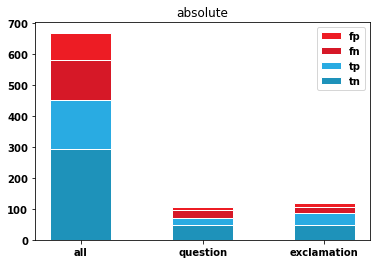

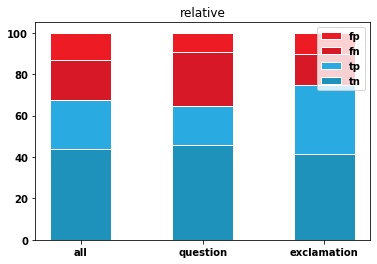

In [4]:
diagram_filters = []
# uppercaseFilters.append(('all',generate_filter(0, 2000, uppercaseWords)))
# addFilterInterval(uppercaseFilters, 0, 10, 1, uppercaseWords)
diagram_filters.append(('all', all))
diagram_filters.append(('question', contains_question))
diagram_filters.append(('exclamation', contains_exclamation))

create_plt(name = "absolute", filters = diagram_filters, relative = False)
create_plt(name = "relative", filters = diagram_filters, relative = True)
# print('All')
# showMetrics(calcMetrics(generate_filter(0, 2000, uppercaseWords)))
# print('1-16')

In [5]:
print('all')
show_metrics(calc_metrics())
print('exclamation')
show_metrics(calc_metrics(diagram_filters[2][1]))
print('exclamation change')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[2][1])))

all


,label hate (245),label nohate (425)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


exclamation


,label hate (51),label nohate (67)
pred hate (51),39,12
pred nohate (67),18,49


accuracy,precision,recall,f1_score
0.7457627118644068,0.7647058823529411,0.6842105263157895,0.7222222222222222


exclamation change


,label hate (245),label nohate (425)
pred hate (251),175,76
pred nohate (419),112,307


accuracy,precision,recall,f1_score
0.7194029850746269,0.6972111553784861,0.6097560975609756,0.650557620817844
